In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from flaml import AutoML


## Data Preprocessing

In [147]:
df = pd.read_csv("spotify.csv", encoding='ISO-8859-1')


In [148]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [149]:
df.shape

(953, 24)

In [150]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [151]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [153]:
# one_hot = OneHotEncoder()
# one_hot_result = one_hot.fit_transform(df[['artist(s)_name']]).toarray()
# df_one_hot = pd.DataFrame(one_hot_result, columns=one_hot.get_feature_names_out(['artist(s)_name']))
# df = df.join(df_one_hot)

In [154]:
label_encoder = LabelEncoder()
df['mode'] = label_encoder.fit_transform(df['mode'])

In [155]:
label_encoder = LabelEncoder()
df['key'] = label_encoder.fit_transform(df['key'])

In [156]:


def clean_and_convert(df, column_name):
 
    # Remove rows where the column value is not a numeric string
    df = df[df[column_name].str.match(r'^\d+$', na=False)]

    # Convert the column to integer
    df[column_name] = df[column_name].astype(int)
    return df


cleaned_df = clean_and_convert(df, 'streams')
cleaned_df


/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_37865/42667742.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].astype(int)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,2,0,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,3,0,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,7,0,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,0,0,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,0,1,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,0,0,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,8,0,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,3,0,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,3,0,82,67,77,8,0,12,5


In [157]:
import pandas as pd

def convert_to_datetime(df, col1, col2, col3, new_col_name, date_format="%Y-%m-%d %H:%M:%S"):
   
    df[new_col_name] = df[col1].astype(str) + '-' + df[col2].astype(str) + '-' + df[col3].astype(str)

    df[new_col_name] = pd.to_datetime(df[new_col_name], format=date_format, errors='coerce')

    return df


cleaned_df = convert_to_datetime(cleaned_df, 'released_year', 'released_month', 'released_day', 'released_date', "%Y-%m-%d")


/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_37865/2404722194.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col_name] = df[col1].astype(str) + '-' + df[col2].astype(str) + '-' + df[col3].astype(str)
/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_37865/2404722194.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col_name] = pd.to_datetime(df[new_col_name], format=date_format, errors='coerce')


In [158]:
cleaned_df['streams'] = pd.to_numeric(cleaned_df['streams'])


/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_37865/3173119766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['streams'] = pd.to_numeric(cleaned_df['streams'])


In [159]:
columns = ['in_deezer_playlists','in_shazam_charts' ]
for column in columns:
    cleaned_df[column] = cleaned_df[column].str.replace(',', '')
    cleaned_df[column] = pd.to_numeric(cleaned_df[column])

/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_37865/1508782084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[column] = cleaned_df[column].str.replace(',', '')
/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_37865/1508782084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[column] = pd.to_numeric(cleaned_df[column])


In [160]:
# Find the max
max = cleaned_df['in_shazam_charts'].max()

# Replace NaN
cleaned_df['in_shazam_charts'].fillna(max+1, inplace=True)

cleaned_df['key'] = cleaned_df['key'].fillna(-1)

/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_37865/2972159049.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df['in_shazam_charts'].fillna(max+1, inplace=True)
/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_37865/2972159049.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['in_shazam_charts']

In [161]:
cleaned_df = cleaned_df.dropna(how='any')
cleaned_df.info( )

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            952 non-null    object        
 1   artist(s)_name        952 non-null    object        
 2   artist_count          952 non-null    int64         
 3   released_year         952 non-null    int64         
 4   released_month        952 non-null    int64         
 5   released_day          952 non-null    int64         
 6   in_spotify_playlists  952 non-null    int64         
 7   in_spotify_charts     952 non-null    int64         
 8   streams               952 non-null    int64         
 9   in_apple_playlists    952 non-null    int64         
 10  in_apple_charts       952 non-null    int64         
 11  in_deezer_playlists   952 non-null    int64         
 12  in_deezer_charts      952 non-null    int64         
 13  in_shazam_charts      952

In [162]:
mean_value = cleaned_df.in_shazam_charts.mean()
cleaned_df.in_shazam_charts.fillna(value=mean_value,inplace=True)

/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_37865/2434210305.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df.in_shazam_charts.fillna(value=mean_value,inplace=True)


In [163]:
cleaned_df.drop(columns=['track_name','released_year','released_month',	'released_day'])

,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
0,"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,826.0,...,2,0,80,89,83,31,0,8,4,2023-07-14
1,Myke Towers,1,1474,48,133716286,48,126,58,14,382.0,...,3,0,71,61,74,7,0,10,4,2023-03-23
2,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,949.0,...,7,0,51,32,53,17,0,31,6,2023-06-30
3,Taylor Swift,1,7858,100,800840817,116,207,125,12,548.0,...,0,0,55,58,72,11,0,11,15,2019-08-23
4,Bad Bunny,1,3133,50,303236322,84,133,87,15,425.0,...,0,1,65,23,80,14,63,11,6,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Selena Gomez,1,953,0,91473363,61,13,37,1,0.0,...,0,0,60,24,39,57,0,8,3,2022-11-03
949,Taylor Swift,1,1180,0,121871870,4,0,8,0,0.0,...,8,0,42,7,24,83,1,12,6,2022-10-21
950,"Feid, Paulo Londra",2,573,0,73513683,2,0,7,0,0.0,...,3,0,80,81,67,4,0,8,6,2022-11-03
951,"Feid, Sech, Jhayco",3,1320,0,133895612,29,26,17,0,0.0,...,3,0,82,67,77,8,0,12,5,2022-10-20


In [164]:
cleaned_df.describe(include=['O'])

,track_name,artist(s)_name
count,952,952
unique,942,644
top,Take My Breath,Taylor Swift
freq,2,34


## Styling Tabulation

In [165]:
df_ = cleaned_df.head(20)


In [166]:
def colour_red_zero(x):
    color = 'red' if (x == 0 or x== None ) else 'white'
    return 'color: '+ color



In [167]:
# df_.style.applymap(colour_red_zero)

In [168]:
df_.style.highlight_max(color='green')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826.000000,125,2,0,80,89,83,31,0,8,4,2023-07-14 00:00:00
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382.000000,92,3,0,71,61,74,7,0,10,4,2023-03-23 00:00:00
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949.000000,138,7,0,51,32,53,17,0,31,6,2023-06-30 00:00:00
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548.000000,170,0,0,55,58,72,11,0,11,15,2019-08-23 00:00:00
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425.000000,144,0,1,65,23,80,14,63,11,6,2023-05-18 00:00:00
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946.000000,141,3,0,92,66,58,19,0,8,24,2023-06-01 00:00:00
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,222,43,13,418.000000,148,7,1,67,83,76,48,0,8,3,2023-03-16 00:00:00
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,89,30,13,194.000000,100,7,0,67,26,71,37,0,11,4,2023-07-07 00:00:00
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,210,48,11,953.000000,130,3,1,85,22,62,12,0,28,9,2023-05-15 00:00:00
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,110,66,13,339.000000,170,4,1,81,56,48,21,0,8,33,2023-03-17 00:00:00


In [169]:
## drop whats not required 

In [170]:
def bold_max(x):
    is_max = (x == x.max())
    return ['font-weight : 900' if y else '' for y in is_max ]

In [171]:
df_.style.highlight_max(color='green').highlight_min(color='red').apply(bold_max)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826.000000,125,2,0,80,89,83,31,0,8,4,2023-07-14 00:00:00
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382.000000,92,3,0,71,61,74,7,0,10,4,2023-03-23 00:00:00
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949.000000,138,7,0,51,32,53,17,0,31,6,2023-06-30 00:00:00
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548.000000,170,0,0,55,58,72,11,0,11,15,2019-08-23 00:00:00
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425.000000,144,0,1,65,23,80,14,63,11,6,2023-05-18 00:00:00
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946.000000,141,3,0,92,66,58,19,0,8,24,2023-06-01 00:00:00
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,222,43,13,418.000000,148,7,1,67,83,76,48,0,8,3,2023-03-16 00:00:00
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,89,30,13,194.000000,100,7,0,67,26,71,37,0,11,4,2023-07-07 00:00:00
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,210,48,11,953.000000,130,3,1,85,22,62,12,0,28,9,2023-05-15 00:00:00
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,110,66,13,339.000000,170,4,1,81,56,48,21,0,8,33,2023-03-17 00:00:00


In [172]:
df_.style.background_gradient(cmap="Reds") #subset=[] can give selected colums here

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826.000000,125,2,0,80,89,83,31,0,8,4,2023-07-14 00:00:00
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382.000000,92,3,0,71,61,74,7,0,10,4,2023-03-23 00:00:00
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949.000000,138,7,0,51,32,53,17,0,31,6,2023-06-30 00:00:00
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548.000000,170,0,0,55,58,72,11,0,11,15,2019-08-23 00:00:00
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425.000000,144,0,1,65,23,80,14,63,11,6,2023-05-18 00:00:00
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946.000000,141,3,0,92,66,58,19,0,8,24,2023-06-01 00:00:00
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,222,43,13,418.000000,148,7,1,67,83,76,48,0,8,3,2023-03-16 00:00:00
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,89,30,13,194.000000,100,7,0,67,26,71,37,0,11,4,2023-07-07 00:00:00
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,210,48,11,953.000000,130,3,1,85,22,62,12,0,28,9,2023-05-15 00:00:00
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,110,66,13,339.000000,170,4,1,81,56,48,21,0,8,33,2023-03-17 00:00:00


## Plots and Visualization 

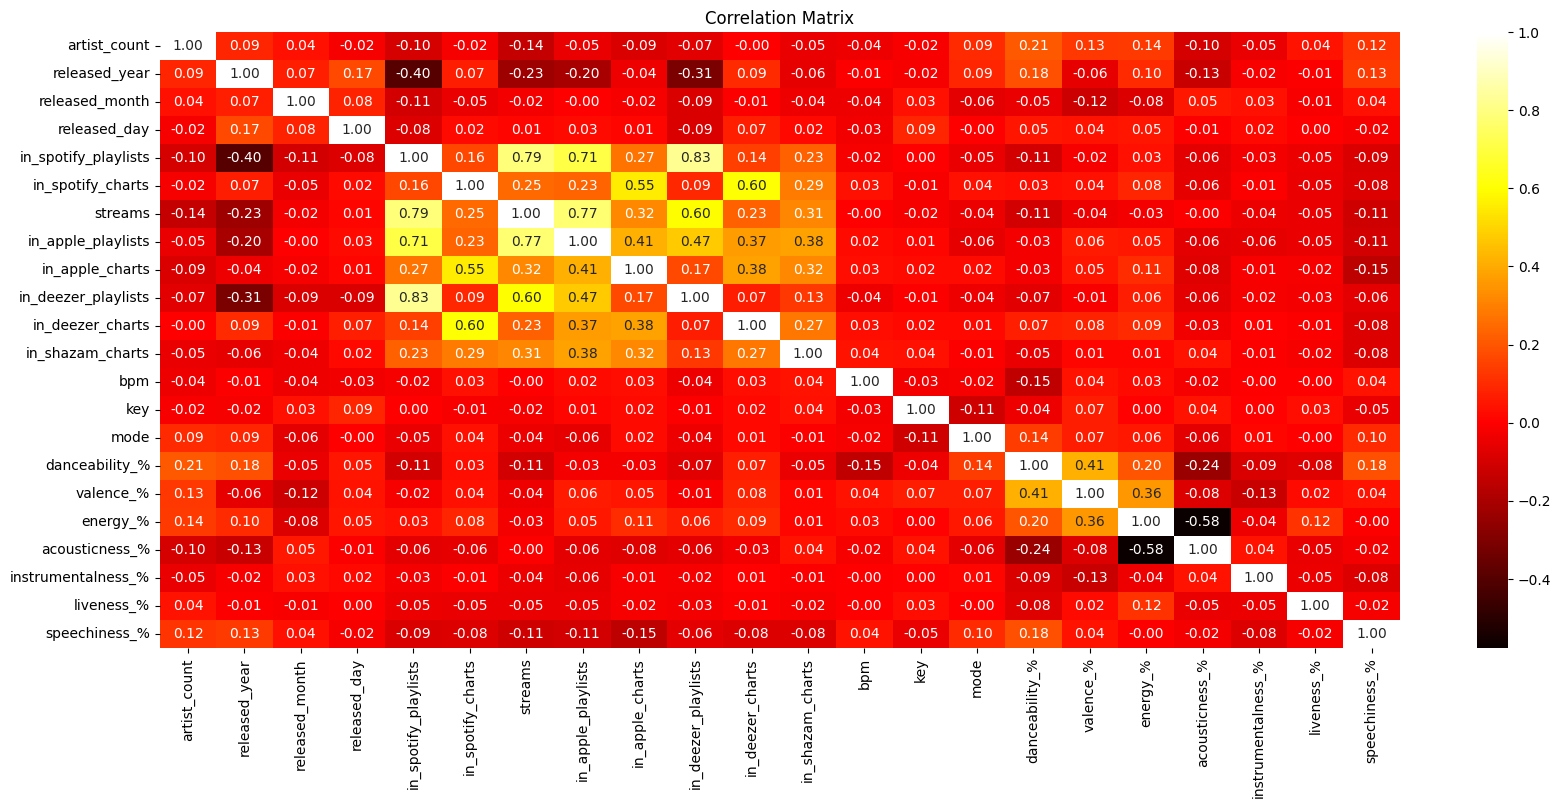

In [173]:
numeric_df = cleaned_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='hot', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Artists In DataSet

/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_37865/3803424588.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='hot')


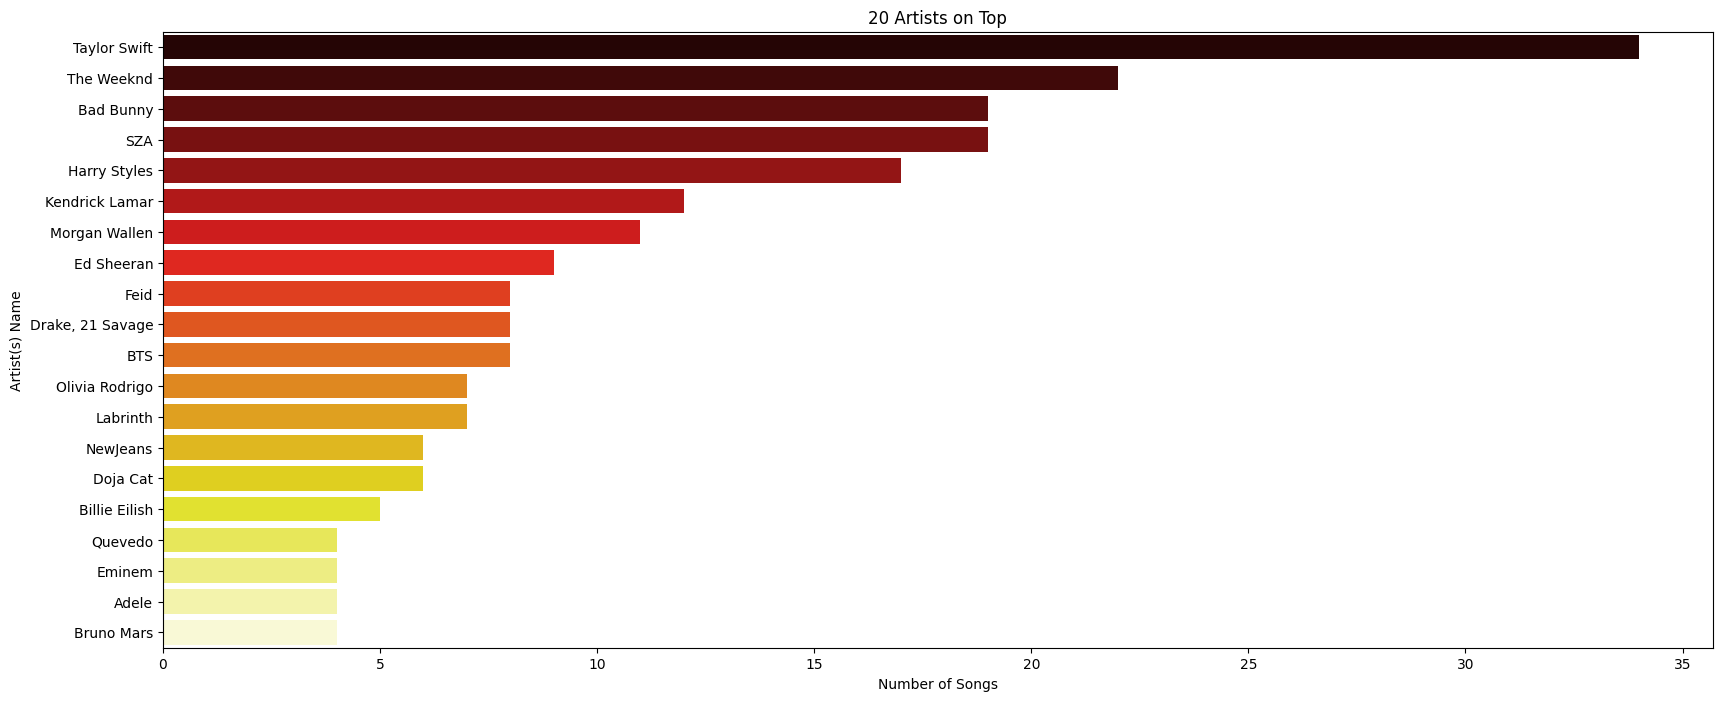

In [174]:
top_artists = cleaned_df['artist(s)_name'].value_counts().head(20)

## plot
plt.figure(figsize=(20, 8))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='hot')
plt.xlabel('Number of Songs')
plt.ylabel('Artist(s) Name')
plt.title('20 Artists on Top')
plt.show()

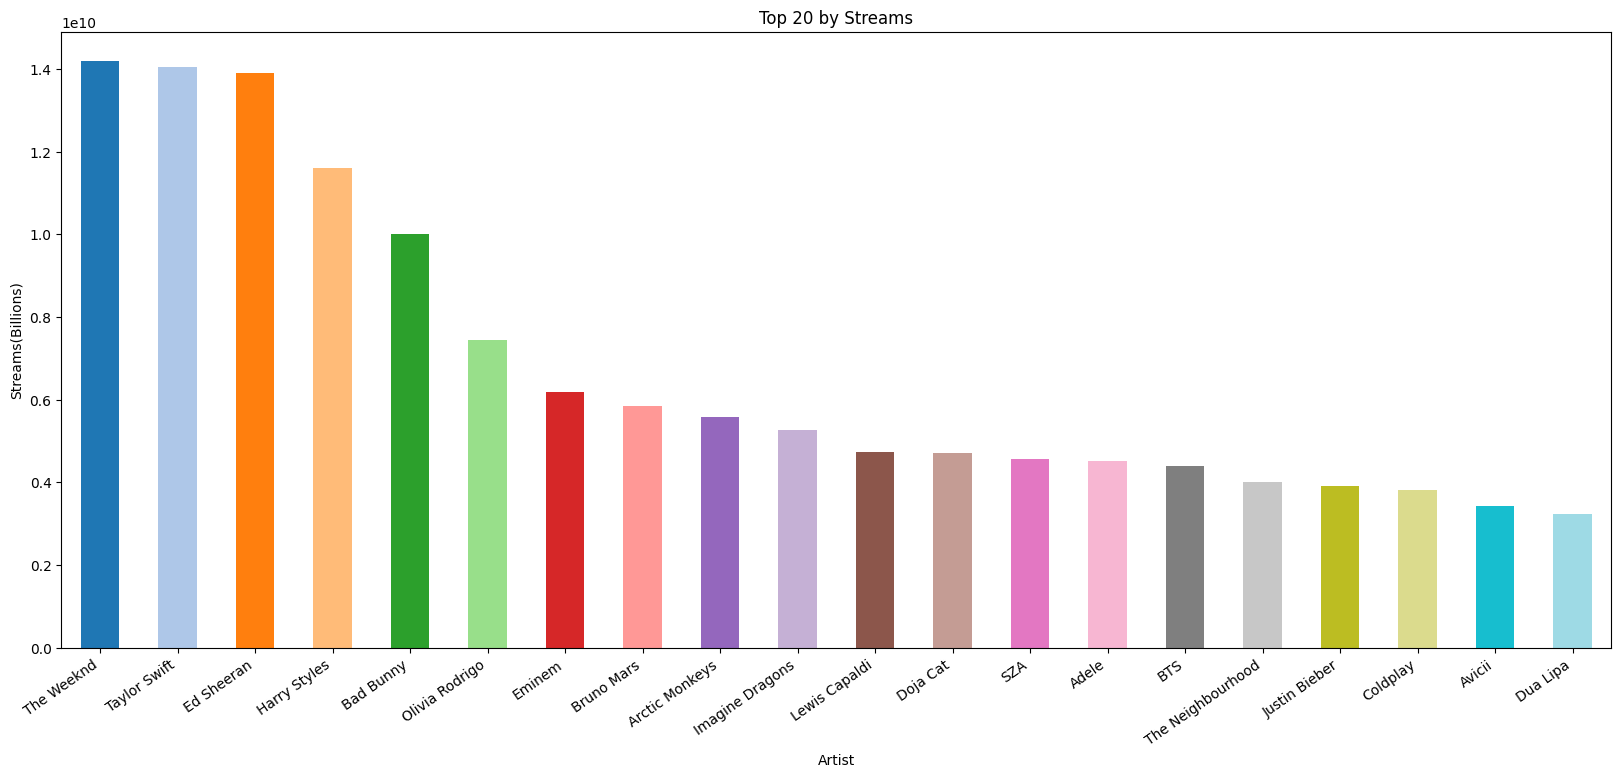

In [175]:

# Group by artist and calculate the total sum of streams
artist_streams = cleaned_df.groupby('artist(s)_name')['streams'].sum()
top_20 = artist_streams.nlargest(20)
colors = sns.color_palette('tab20', len(top_20))
plt.figure(figsize=(20, 8))
top_20.plot(kind='bar', color=colors)
plt.title('Top 20 by Streams')
plt.xlabel('Artist')
plt.ylabel('Streams(Billions)')
plt.xticks(rotation=35, ha='right')
plt.show()

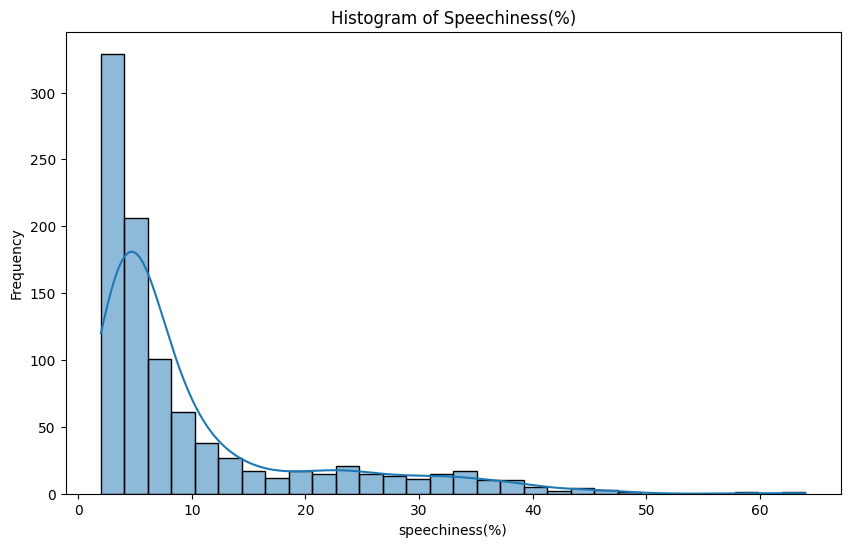

In [176]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['speechiness_%'], bins=30, kde=True)
plt.xlabel('speechiness(%)')
plt.ylabel('Frequency')
plt.title('Histogram of Speechiness(%)')
plt.show()

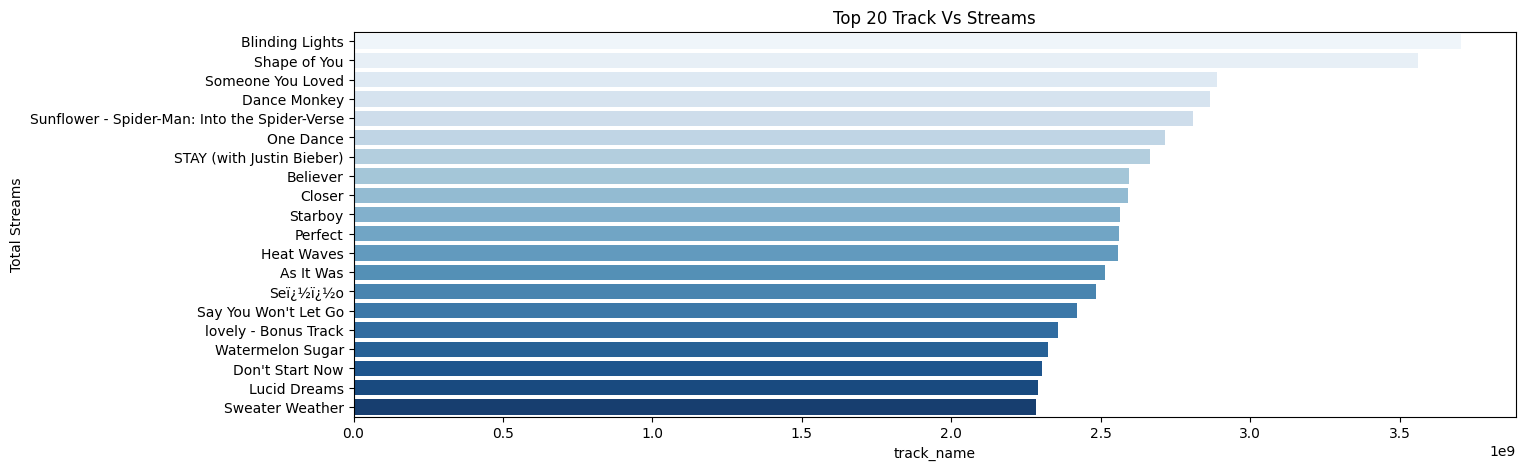

In [177]:

top_spotify_streams = cleaned_df[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(20)

plt.figure(figsize=(15, 5))
sns.barplot(x=top_spotify_streams['streams'], y=top_spotify_streams['track_name'], palette='Blues', hue=top_spotify_streams['track_name'])

plt.xlabel('track_name')
plt.ylabel('Total Streams')
plt.title('Top 20 Track Vs Streams')
plt.show()





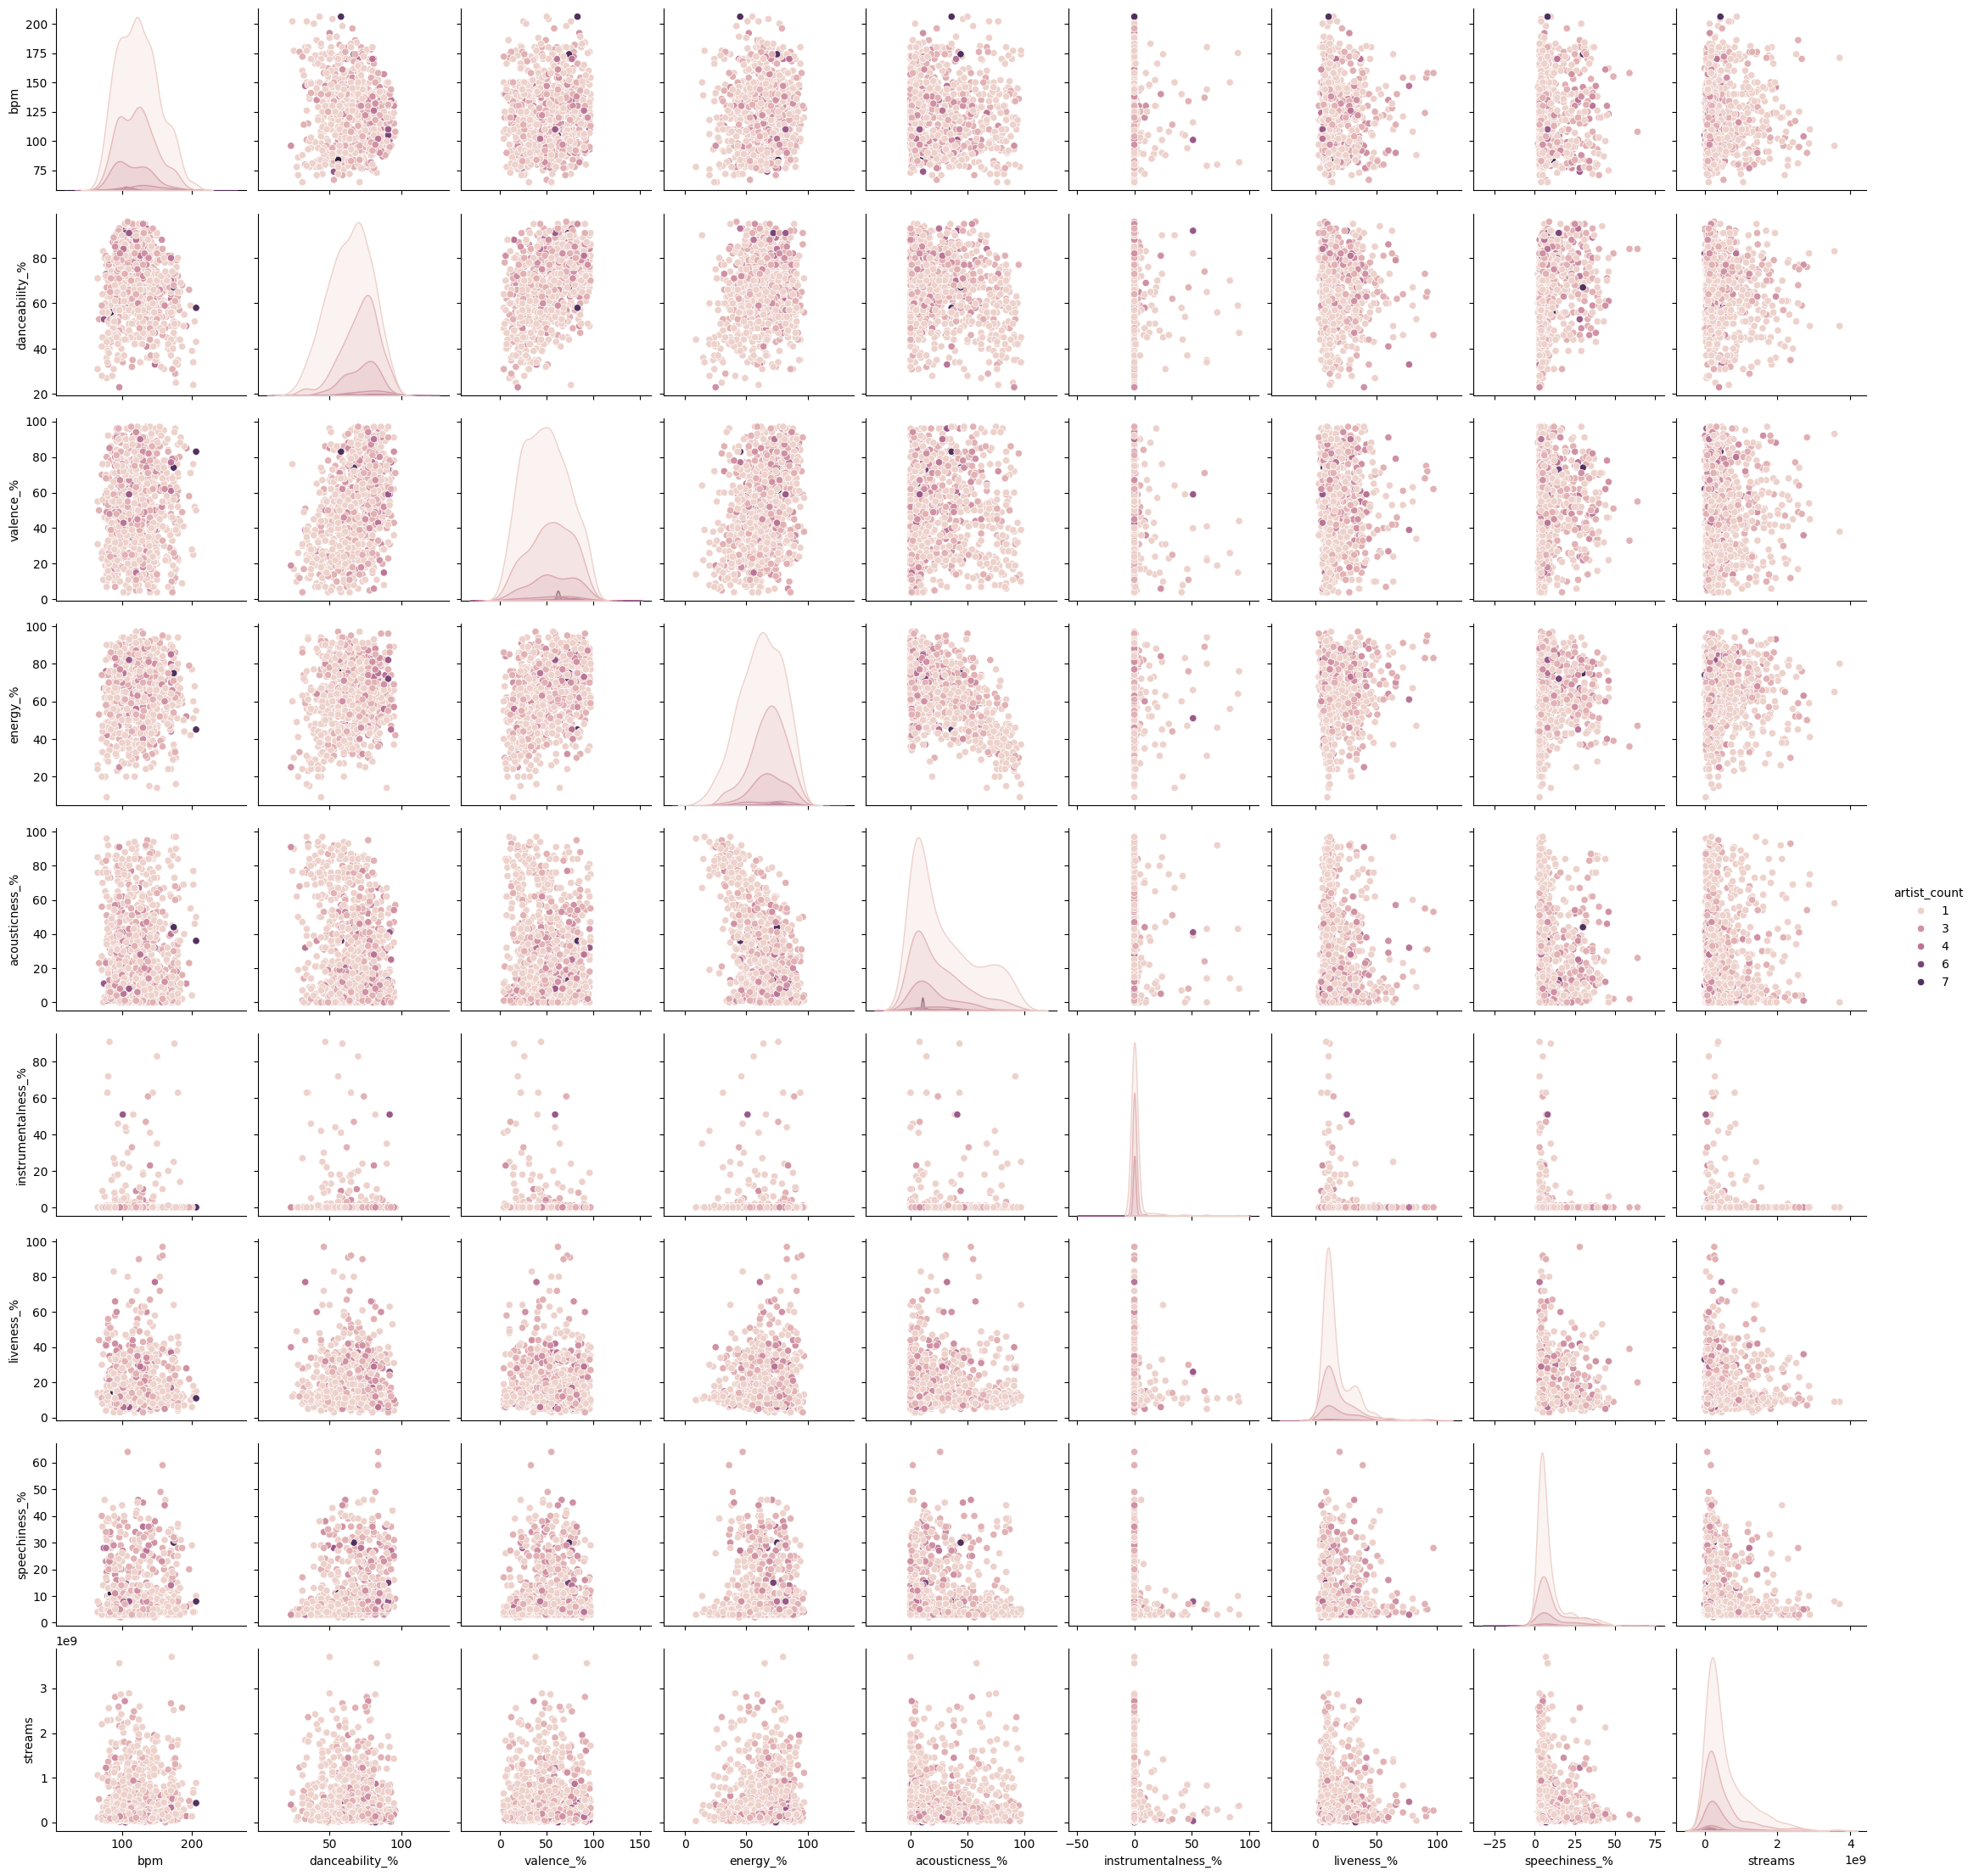

In [178]:
sns.pairplot(cleaned_df, hue='artist_count', vars=['bpm','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%','streams'])

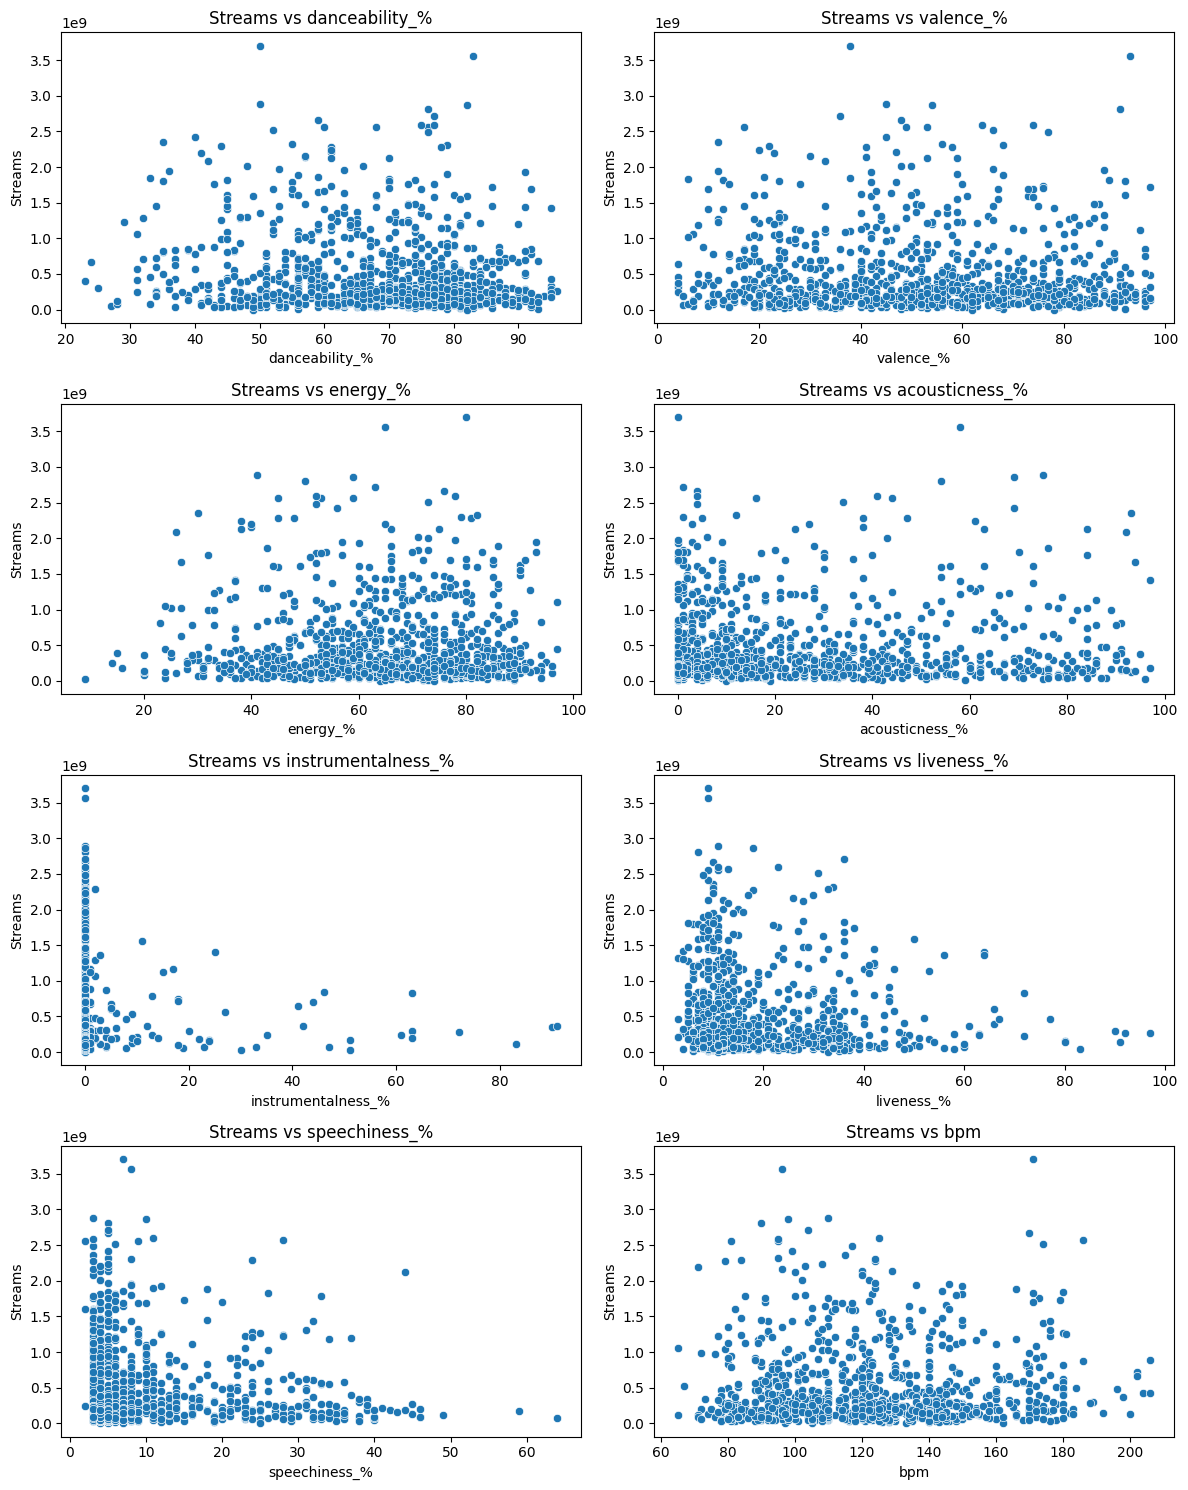

In [179]:
# Define the columns to plot
features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
            'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm']

# Create subplots for each feature
num_features = len(features)
cols = 2  # Number of columns in the subplot grid
rows = -(-num_features // cols)  # Calculate the number of rows

fig, axes = plt.subplots(rows, cols, figsize=(12, 15))

# Plot each feature against 'streams'
for i, feature in enumerate(features):
    row = i // cols
    col = i % cols
    sns.scatterplot(x=feature, y='streams', data=cleaned_df, ax=axes[row, col])
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Streams')
    axes[row, col].set_title(f'Streams vs {feature}')

# Hide empty subplots if the number of features is not a perfect fit
for j in range(num_features, rows * cols):
    axes[j // cols, j % cols].axis('off')

plt.tight_layout()
plt.show()

## Splitting Train and Test

In [180]:



X = cleaned_df[['artist_count', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 
    'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 
    'bpm', 'key', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
    'instrumentalness_%', 'liveness_%', 'speechiness_%']]

y = cleaned_df['streams']  # Target variable

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [181]:
automl = AutoML()
models =  automl.fit(X_train, y_train, task="classification")

[flaml.automl.logger: 03-07 10:04:54] {1679} INFO - task = classification
[flaml.automl.logger: 03-07 10:04:54] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 03-07 10:05:00] {1788} INFO - Minimizing error metric: log_loss
[flaml.automl.logger: 03-07 10:05:00] {1811} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. Zero-shot AutoML is used for certain tasks and estimators. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.
[flaml.automl.logger: 03-07 10:05:00] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 03-07 10:05:00] {2218} INFO - iteration 0, current learner lgbm


TypeError: 'NoneType' object is not callable

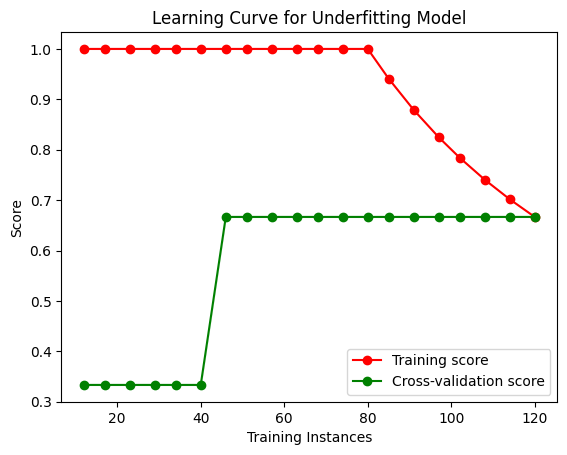

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create a very simple Decision Tree classifier that is likely to underfit
classifier = DecisionTreeClassifier(max_depth=1)

# Generate learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=classifier,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 20),
    cv=5,
    n_jobs=-1
)

# Calculate the average and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot the learning curves
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve for Underfitting Model")
plt.xlabel("Training Instances")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


In [25]:
train_scores_mean.shape

(20,)

In [24]:
validation_scores_mean.shape

(20,)